# Introduction

The dataset was released by Aspiring Minds from the Aspiring Mind Employment Outcome 2015 (AMEO).The  main gole of  this dataset is to determine the factors influencing the salaries of engineering graduates. The specific objectives are:

1. **Identify Key Factors**: Understand which skills and characteristics (such as grades, college tier, and personality traits) are most closely related to salary levels.

2. **Predict Salaries**: Develop a model that can predict a graduate's salary based on their background and skills.

3. **Inform Educational Choices**: Assist current and future students in understanding which skills or experiences might lead to higher salaries, guiding them in their educational and career decisions.

4. **Explore Trends**: Investigate how salaries differ based on factors like location, gender, and job roles, to uncover potential inequalities or trends in the job market.

Overall, this analysis aims to provide valuable insights into the job market for engineering graduates, enabling them to make more informed decisions regarding their education and career paths.

In [2]:
#importing required librarys
import pandas as pd
import numpy as np
#main goal of analyzing this

In [5]:
#reading the excel file
df = pd.read_csv(r"C:\Users\anees\Data Analysis\IntenShip\Data Sets\data.xlsx - Sheet1.csv")
df.drop("Unnamed: 0",axis=1,inplace=True)
df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [6]:
df.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

In [7]:
#shape of the data
df.shape

(3998, 38)

In [8]:
#information about AMCAT data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     3998 non-null   int64  
 1   Salary                 3998 non-null   float64
 2   DOJ                    3998 non-null   object 
 3   DOL                    3998 non-null   object 
 4   Designation            3998 non-null   object 
 5   JobCity                3998 non-null   object 
 6   Gender                 3998 non-null   object 
 7   DOB                    3998 non-null   object 
 8   10percentage           3998 non-null   float64
 9   10board                3998 non-null   object 
 10  12graduation           3998 non-null   int64  
 11  12percentage           3998 non-null   float64
 12  12board                3998 non-null   object 
 13  CollegeID              3998 non-null   int64  
 14  CollegeTier            3998 non-null   int64  
 15  Degr

# (1) Exploratory Data Analysis

Getting the insights from the data which include missing values, duplicate values, Outliers, Distributions, Relationships

In [9]:
#checking the missing values
df.isna().sum()

ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
o

In [10]:
#checking Duplicte Values
df.duplicated().sum()

0

In [11]:
numerical_columns = df.select_dtypes(include=['number'])
numerical_columns

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000.0,84.30,2007,95.80,1141,2,78.00,1141,0,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000.0,85.40,2007,85.00,5807,2,70.06,5807,0,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000.0,85.00,2010,68.20,64,2,70.00,64,0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000.0,85.60,2007,83.60,6920,1,74.64,6920,1,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000.0,78.00,2008,76.80,11368,2,73.90,11368,0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,47916,280000.0,52.09,2006,55.50,6268,2,61.50,6268,0,...,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,752781,100000.0,90.00,2009,93.00,4883,2,77.30,4883,1,...,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,355888,320000.0,81.86,2008,65.50,9786,2,70.00,9786,0,...,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,947111,200000.0,78.72,2010,69.88,979,2,70.42,979,1,...,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


# 2) Uni-Varient Analysis

### *Analysiing the project using single variable/feature

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     3998 non-null   int64  
 1   Salary                 3998 non-null   float64
 2   DOJ                    3998 non-null   object 
 3   DOL                    3998 non-null   object 
 4   Designation            3998 non-null   object 
 5   JobCity                3998 non-null   object 
 6   Gender                 3998 non-null   object 
 7   DOB                    3998 non-null   object 
 8   10percentage           3998 non-null   float64
 9   10board                3998 non-null   object 
 10  12graduation           3998 non-null   int64  
 11  12percentage           3998 non-null   float64
 12  12board                3998 non-null   object 
 13  CollegeID              3998 non-null   int64  
 14  CollegeTier            3998 non-null   int64  
 15  Degr

## 3) What is the distribution of salary

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
pd.DataFrame(df['Salary'].describe())

,Salary
count,3.998000e+03
mean,3.076998e+05
std,2.127375e+05
min,3.500000e+04
25%,1.800000e+05
50%,3.000000e+05
75%,3.700000e+05
max,4.000000e+06


Text(0.5, 1.0, 'Distribution of Salary')

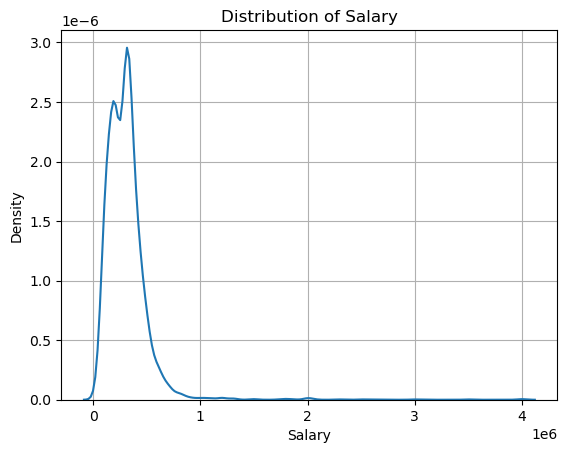

In [20]:
sns.kdeplot(data=df["Salary"])
plt.grid()
plt.title("Distribution of Salary")

### Insights

•In between 0 to 1,00,000 the salaries are more compared to other salaries.

•After 3,00,000 there are less salries


## 4)  What is the average college GPA of students?

In [21]:
df["collegeGPA"].mean()

71.48617058529265

## 5) What are the count of different job citys values?

In [22]:
pd.DataFrame(df["JobCity"].value_counts())

,count
JobCity,
Bangalore,627
-1,461
Noida,368
Hyderabad,335
Pune,290
...,...
Tirunelvelli,1
Ernakulam,1
Nanded,1


##  6) Among all the students which specialization is the most common?

In [23]:
df["Specialization"].value_counts().head(15)

Specialization
electronics and communication engineering      880
computer science & engineering                 744
information technology                         660
computer engineering                           600
computer application                           244
mechanical engineering                         201
electronics and electrical engineering         196
electronics & telecommunications               121
electrical engineering                          82
electronics & instrumentation eng               32
civil engineering                               29
electronics and instrumentation engineering     27
information science engineering                 27
instrumentation and control engineering         20
electronics engineering                         19
Name: count, dtype: int64

In [24]:
df1= df["Specialization"].value_counts().head(15)

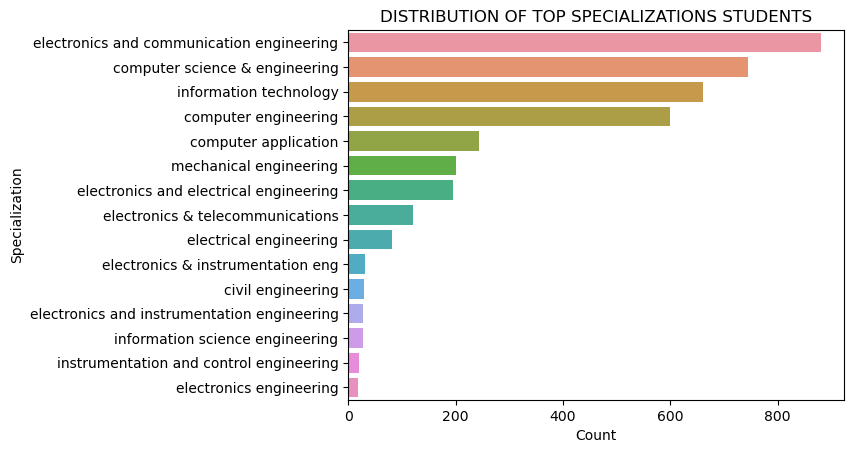

In [25]:
# Creating the bar plot
sns.barplot(y=df1.index, x=df1.values)
plt.title("DISTRIBUTION OF TOP SPECIALIZATIONS STUDENTS")
plt.xlabel("Count")
plt.ylabel("Specialization")
plt.show()


### Insights
There are many ECE, computer science and IT engineers compared to others.

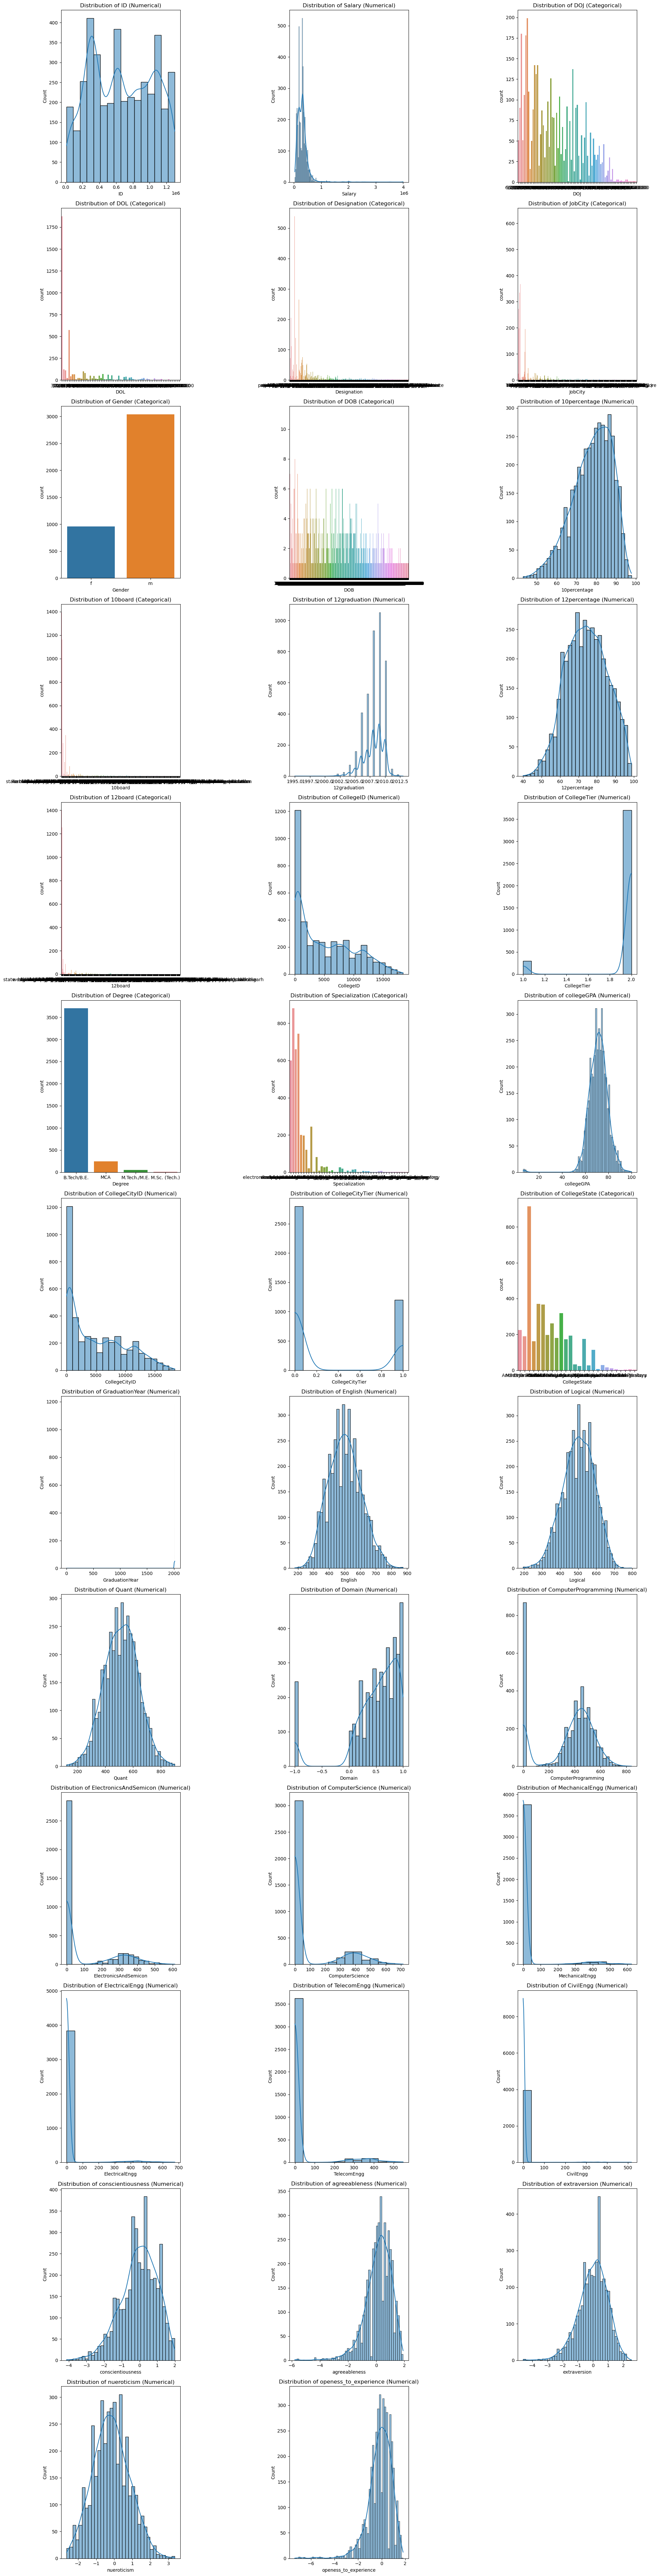

In [26]:
# Assuming df is your DataFrame
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the number of subplots based on the number of columns
n_cols = len(df.columns)
n_rows = int(np.ceil(n_cols / 3))  # 3 columns per row for better layout
fig, axes = plt.subplots(n_rows, 3, figsize=(20, n_rows * 6))
axes = axes.flatten()  # Flatten the axes array for easier indexing

# Iterate over each column in the DataFrame and each subplot axis
for i, col in enumerate(df.columns):
    try:
        # Check if the column is categorical
        if df[col].dtype == 'object' or df[col].dtype.name == 'category':
            # Categorical column - use countplot
            sns.countplot(x=col, data=df, ax=axes[i])
            axes[i].set_title(f'Distribution of {col} (Categorical)')
        # Check if the column is datetime
        elif pd.api.types.is_datetime64_any_dtype(df[col]):
            # Datetime column - safely convert to datetime, coerce errors to NaT
            df[col] = pd.to_datetime(df[col], errors='coerce')
            df[col].value_counts().sort_index().plot(ax=axes[i])
            axes[i].set_title(f'Time Distribution of {col} (Datetime)')
            axes[i].set_xlabel('Date')
            axes[i].set_ylabel('Count')
        # Check if the column is numerical
        elif pd.api.types.is_numeric_dtype(df[col]):
            # Numerical column - use histplot
            sns.histplot(df[col], kde=True, ax=axes[i])
            axes[i].set_title(f'Distribution of {col} (Numerical)')
    except Exception as e:
        print(f"Could not plot column '{col}' due to: {e}")
        axes[i].set_title(f"Error plotting {col}")

# Hide unused axes if fewer columns than subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout for better spacing between subplots
plt.tight_layout()
plt.show()


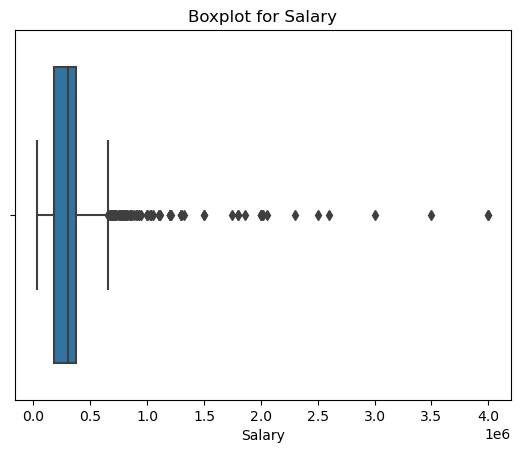

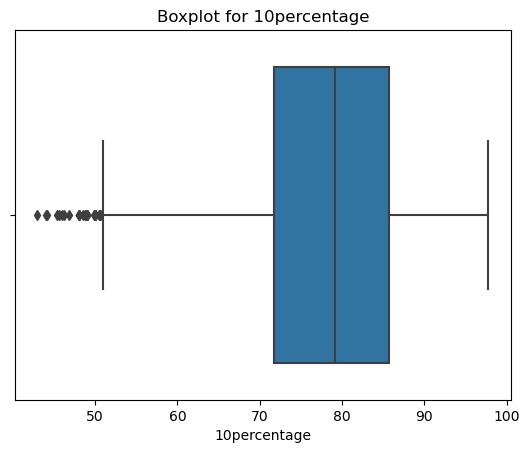

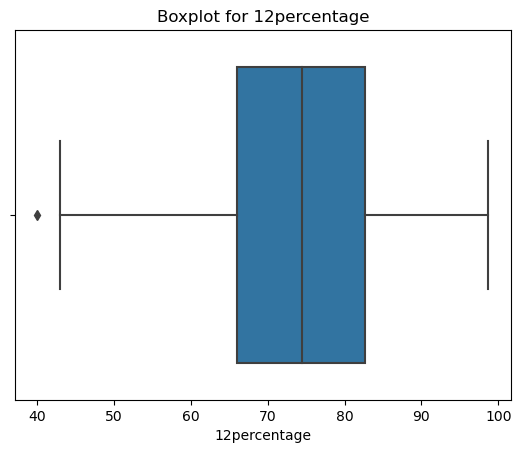

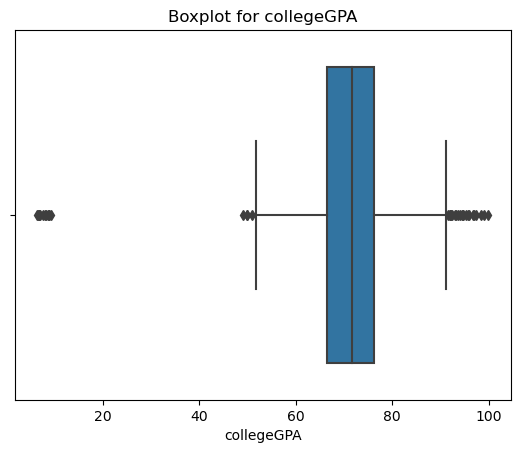

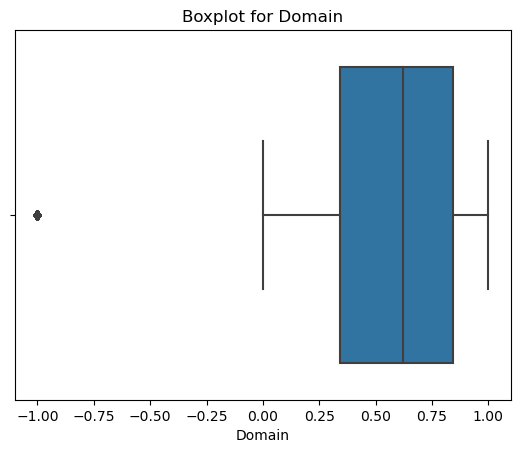

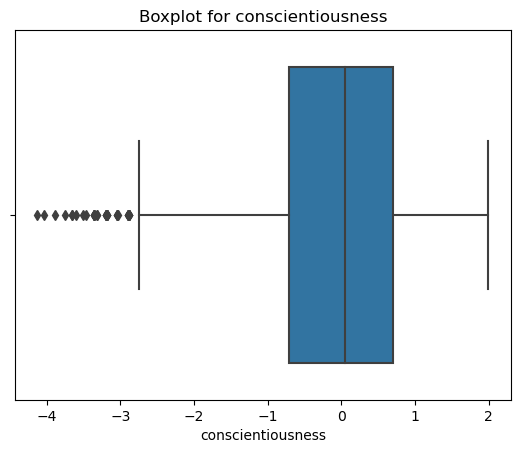

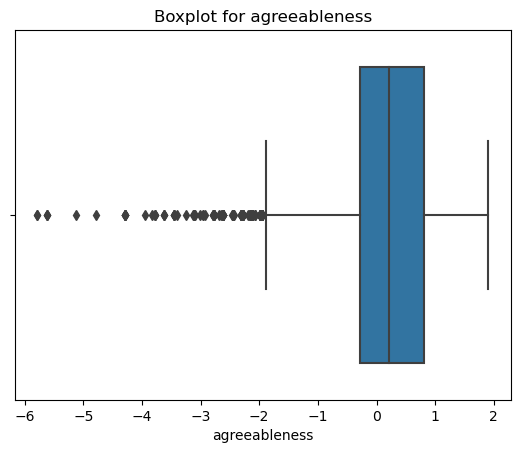

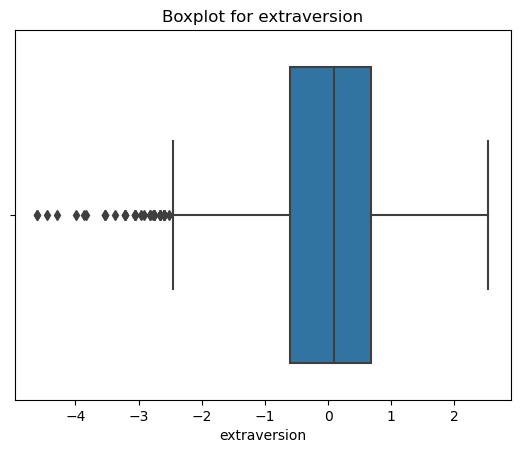

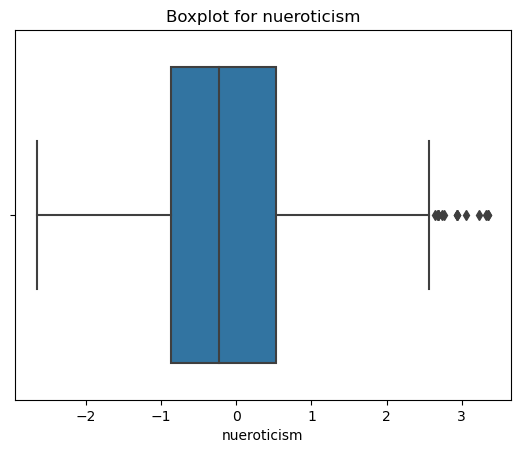

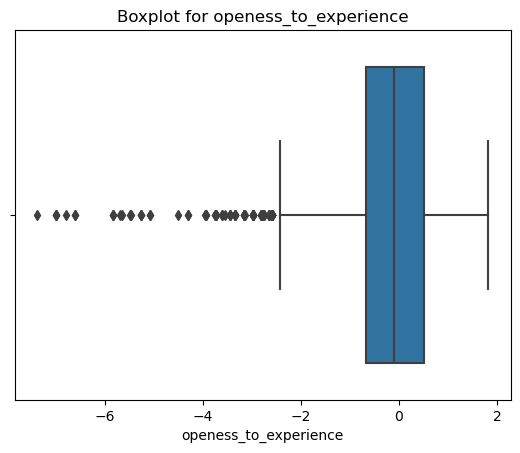

In [27]:
for i in df.columns:
    if df[i].dtype =="int" or df[i].dtype=="float": 
        sns.boxplot(x=df[i])
        plt.title("Boxplot for {}".format(i))
        plt.show()
    

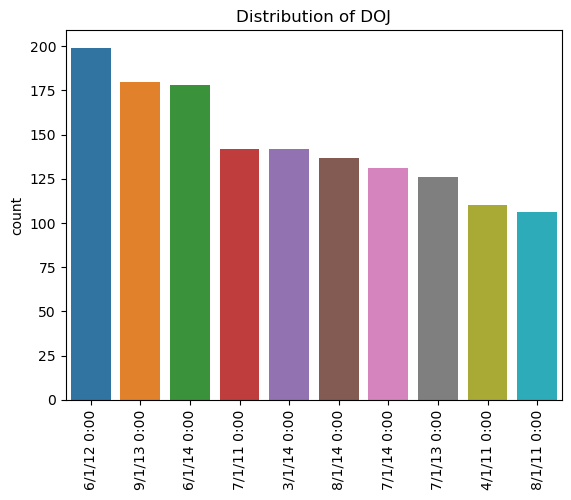

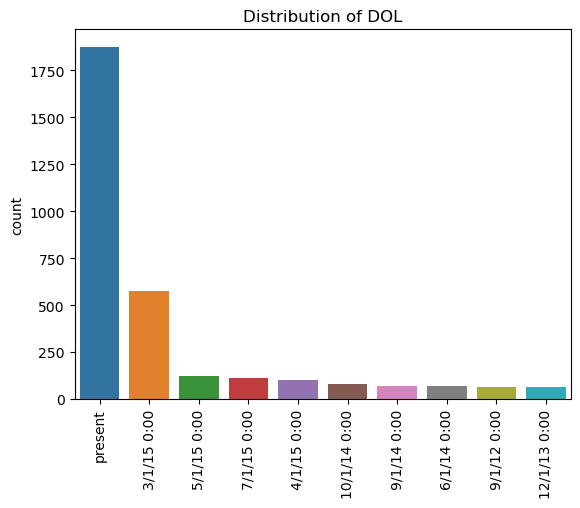

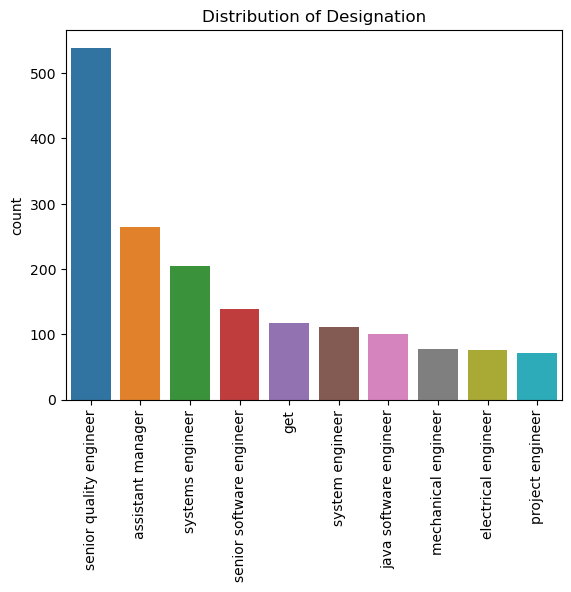

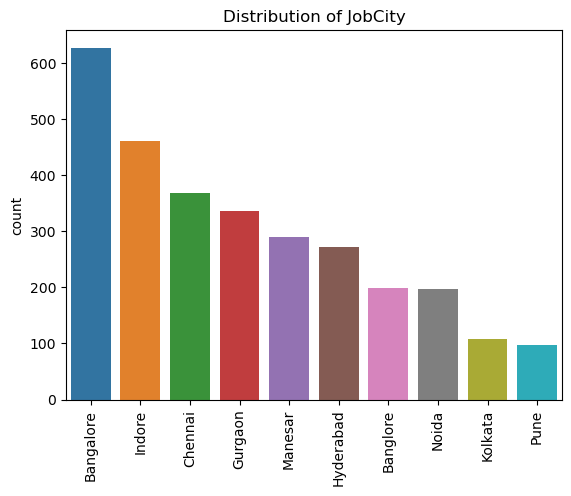

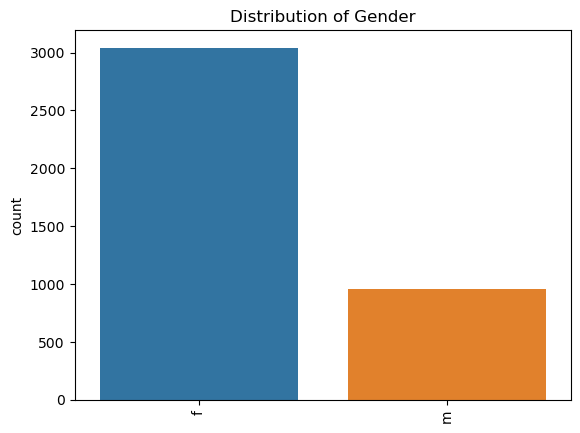

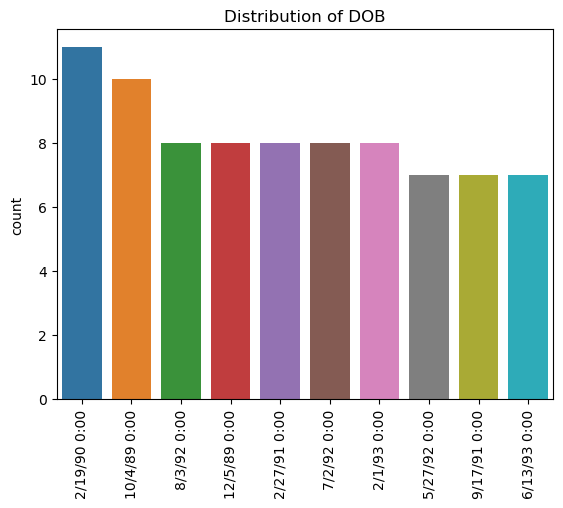

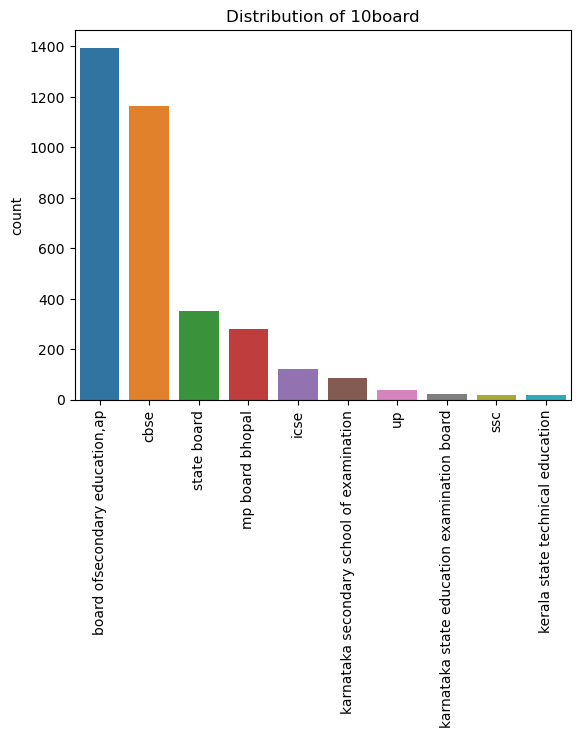

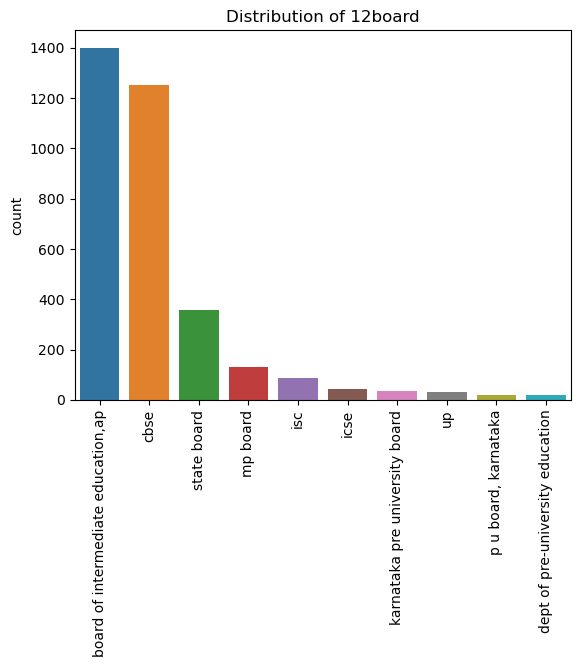

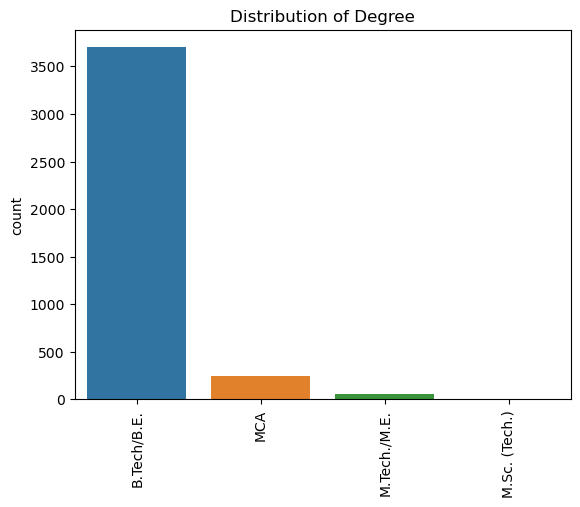

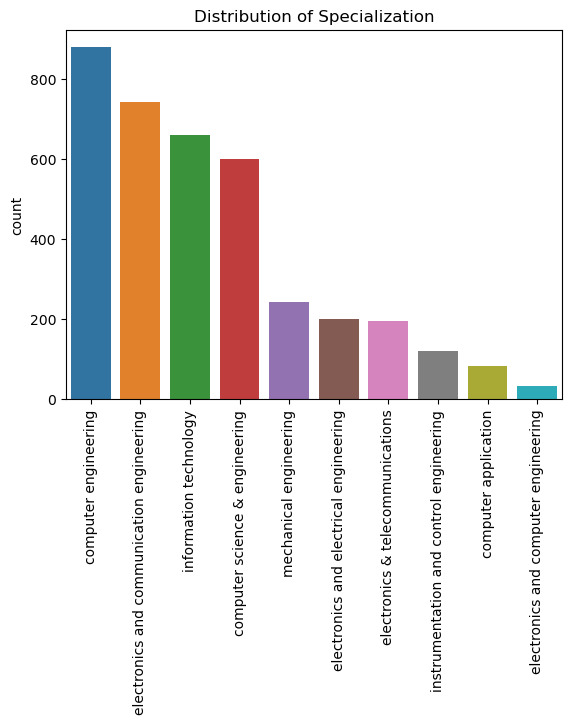

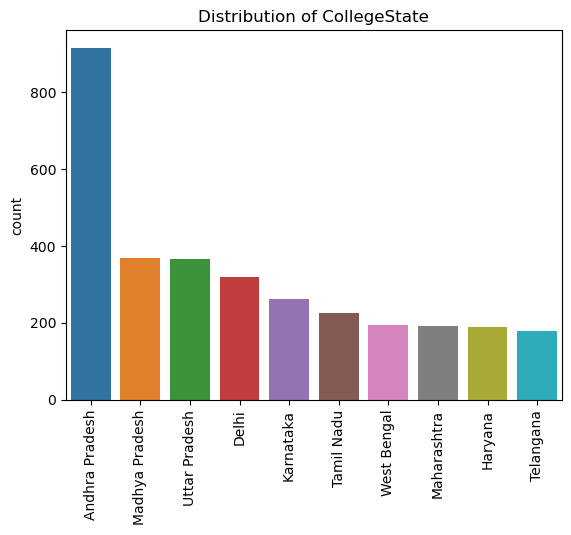

In [28]:
for i in df.columns:
    if df[i].dtype == "object":
        try:
            sns.barplot(x=df[i].unique()[:10], y=df[i].value_counts()[:10])
            plt.title("Distribution of {}".format(i))
            plt.xticks(rotation=90)
            plt.show()
        except Exception as e:
            print(f"Error occurred in column {i}: {e}")


## 7) BiVariant Analysis

#### Analysing the data using two features 

### How does collegeGPA vary across different Specialization?

In [29]:

g1 = df.groupby("Specialization")[["collegeGPA"]].mean().sort_values(by="collegeGPA", ascending=False)

g1


,collegeGPA
Specialization,
embedded systems technology,88.000000
control and instrumentation engineering,82.100000
information science,81.200000
internal combustion engine,80.600000
industrial & management engineering,80.000000
computer science,77.385000
computer and communication engineering,77.260000
power systems and automation,76.000000
other,75.619231


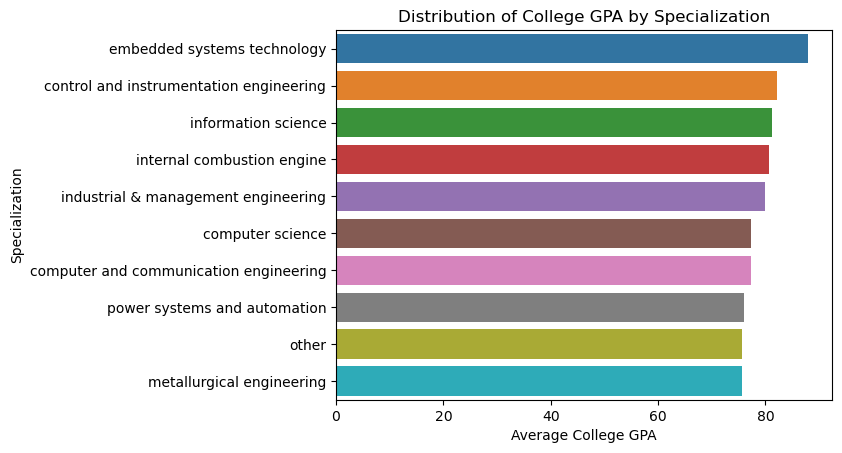

In [30]:

# Group by "Specialization" and calculate the mean of "collegeGPA"
g1 = df.groupby("Specialization")[["collegeGPA"]].mean().sort_values(by="collegeGPA", ascending=False)

# Take the top 10 specializations
top_specializations = g1.head(10)

# Create the bar plot for the top specializations
sns.barplot(y=top_specializations.index, x=top_specializations["collegeGPA"])
plt.title("Distribution of College GPA by Specialization")
plt.xlabel("Average College GPA")
plt.ylabel("Specialization")
plt.show()


### Insights
• The Average GPA of embedded systems is more compared to others

• There are less GPA for others,metallurgical engineering compared to others.


### Relationship between Gender and Salary?

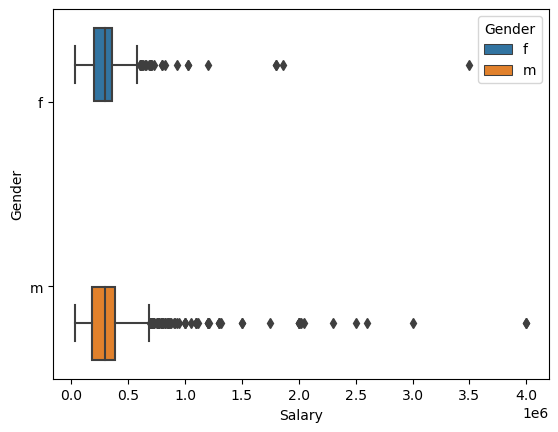

In [31]:
sns.boxplot(y=df["Gender"],x=df["Salary"],hue=df["Gender"])
plt.show()

###  Does the GraduationYear impact JobCity selection?

In [32]:
g2=pd.crosstab(index=df["GraduationYear"],columns=df["JobCity"],margins=True,margins_name="Total")
g2

JobCity,Chennai,Delhi,Mumbai,Pune,ariyalur,bangalore,mumbai,-1,"A-64,sec-64,noida",AM,...,shahibabad,singaruli,sonepat,thane,trivandrum,udaipur,vapi,vizag,vsakhapttnam,Total
GraduationYear,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2007,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2009,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,24
2010,0,0,1,0,1,1,0,16,0,0,...,0,0,1,0,0,0,0,0,1,292
2011,0,0,0,0,0,0,0,44,0,0,...,0,0,0,1,0,1,0,0,0,507
2012,1,0,0,1,0,0,0,115,0,0,...,0,0,0,0,0,1,0,0,0,847
2013,0,1,1,0,0,0,1,170,0,0,...,1,0,0,0,1,0,0,0,0,1181
2014,0,0,0,0,0,0,0,108,1,1,...,0,0,0,0,1,0,1,1,0,1036
2015,0,0,0,0,0,0,0,6,0,0,...,0,0,0,0,0,0,0,0,0,94


### 8)  Does Designation affect Salary?

In [33]:
g3=df.groupby("Designation")[["Salary"]].mean()
g3

,Salary
Designation,
.net developer,223382.352941
.net web developer,196250.000000
account executive,287500.000000
account manager,350000.000000
admin assistant,102500.000000
...,...
web designer and seo,200000.000000
web developer,168981.481481
web intern,205000.000000


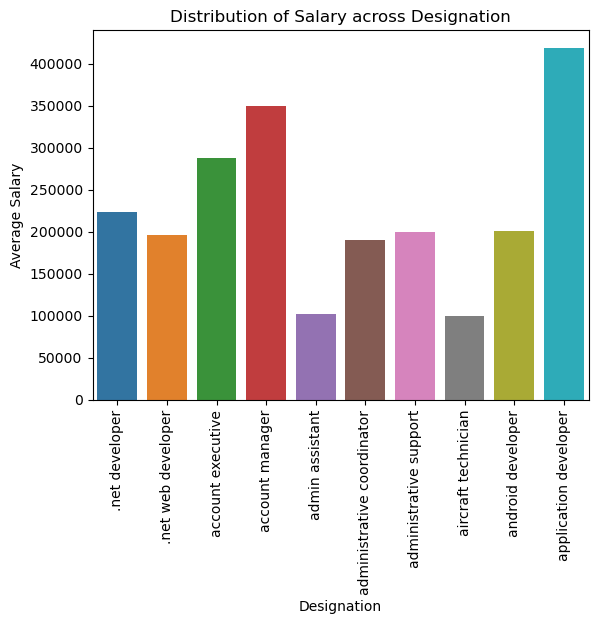

In [34]:
# Select the top 10 designations based on salary
top_designations = g3.head(10)

# Create the bar plot for the top designations
sns.barplot(x=top_designations.index, y=top_designations["Salary"])
plt.xticks(rotation=90)
plt.title("Distribution of Salary across Designation")
plt.xlabel("Designation")
plt.ylabel("Average Salary")
plt.show()


### Inights
• The Average salary of application develpoer is more compared to other designations.

• There are less salaries for admin assistant and aircraft technician.

## 9) Multivariate Analysis

#### • Analysing the data using more then two features.

#### 9.1) Does the combination of CollegeTier and Specialization influence Salary?

In [35]:
g4=df.pivot_table(columns="CollegeTier",index="Specialization",values="Salary",aggfunc="mean")
g4.head()

CollegeTier,1,2
Specialization,,
aeronautical engineering,NaN,148333.333333
applied electronics and instrumentation,NaN,348333.333333
automobile/automotive engineering,NaN,222000.000000
biomedical engineering,435000.0,145000.000000
biotechnology,382500.0,234615.384615


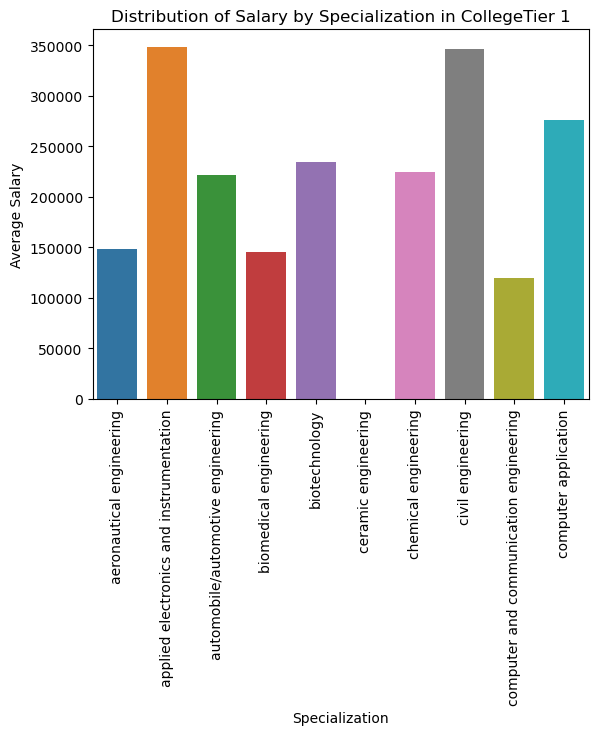

In [36]:
g4 = g4.rename(columns={g4.columns[1]: 'Salary'})  

top_specializations = g4.head(10)  # Take top 10 rows

# Create the bar plot
sns.barplot(x=top_specializations.index, y=top_specializations['Salary'])
plt.xlabel("Specialization")
plt.ylabel("Average Salary")
plt.title("Distribution of Salary by Specialization in CollegeTier 1")
plt.xticks(rotation=90)
plt.show()

### Insights

• In Collge Tier1 there are less Ceramic Engineers compared to others.

• There are more in civil,applied electronic

### 9.2) How does Quant, Logical, and English scores collectively impact the Salary?

C:\Users\anees\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


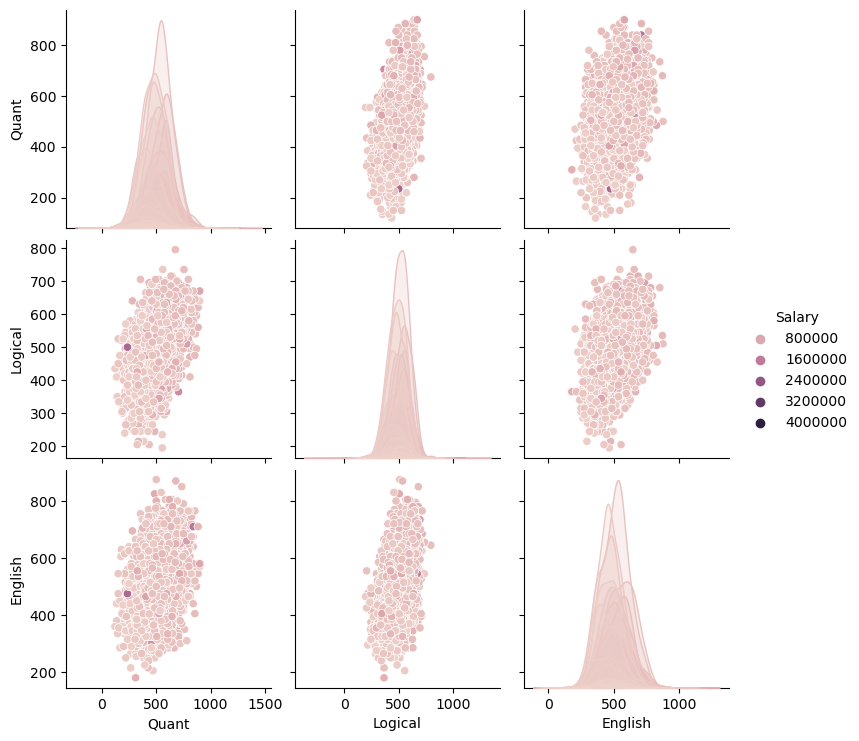

In [37]:
sns.pairplot(df, vars=['Quant', 'Logical', 'English'], hue='Salary')
plt.show()

### 9.3) How do different Engineering specializations (e.g., ComputerScience, Elec-tronicsAndSemicon, MechanicalEngg) contribute to Salary?

In [38]:
df[['ComputerScience', 'ElectronicsAndSemicon', 'MechanicalEngg', 'Salary']].corr()

,ComputerScience,ElectronicsAndSemicon,MechanicalEngg,Salary
ComputerScience,1.000000,-0.273707,-0.124355,-0.100720
ElectronicsAndSemicon,-0.273707,1.000000,-0.109434,0.000665
MechanicalEngg,-0.124355,-0.109434,1.000000,0.018475
Salary,-0.100720,0.000665,0.018475,1.000000


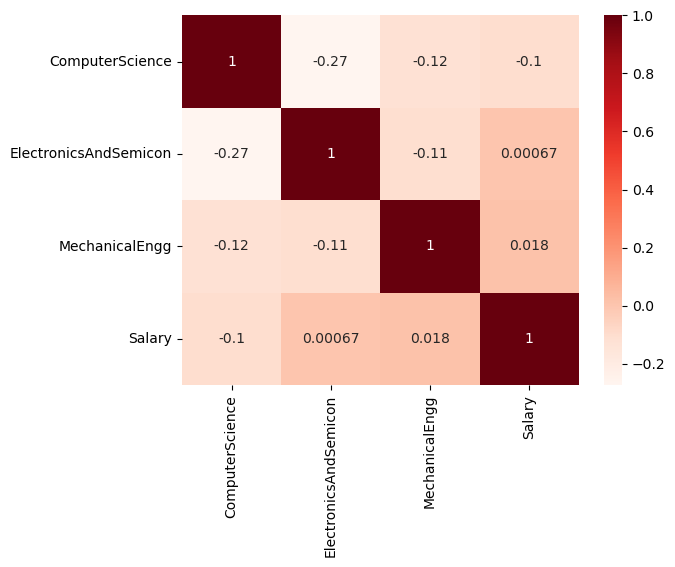

In [39]:
sns.heatmap(df[['ComputerScience', 'ElectronicsAndSemicon', 'MechanicalEngg','Salary']].corr(),annot=True,cmap="Reds")
plt.show()

### 9.4) Does the combination of Gender, Specialization, and collegeGPA affect Salary?

In [40]:
grouped_df=df.groupby(['Gender', 'Specialization'])[['collegeGPA', 'Salary']].mean()
grouped_df

collegeGPA         Salary
Gender Specialization                                                    
f      aeronautical engineering                  77.000000  180000.000000
       applied electronics and instrumentation   78.750000  287500.000000
       biomedical engineering                    64.650000  290000.000000
       biotechnology                             72.941111  247222.222222
       chemical engineering                      55.600000  100000.000000
...                                                    ...            ...
m      metallurgical engineering                 75.550000  337500.000000
       other                                     75.619231  266538.461538
       polymer technology                        72.790000  700000.000000
       power systems and automation              76.000000  100000.000000
       telecommunication engineering             77.476000  351000.000000

[71 rows x 2 columns]

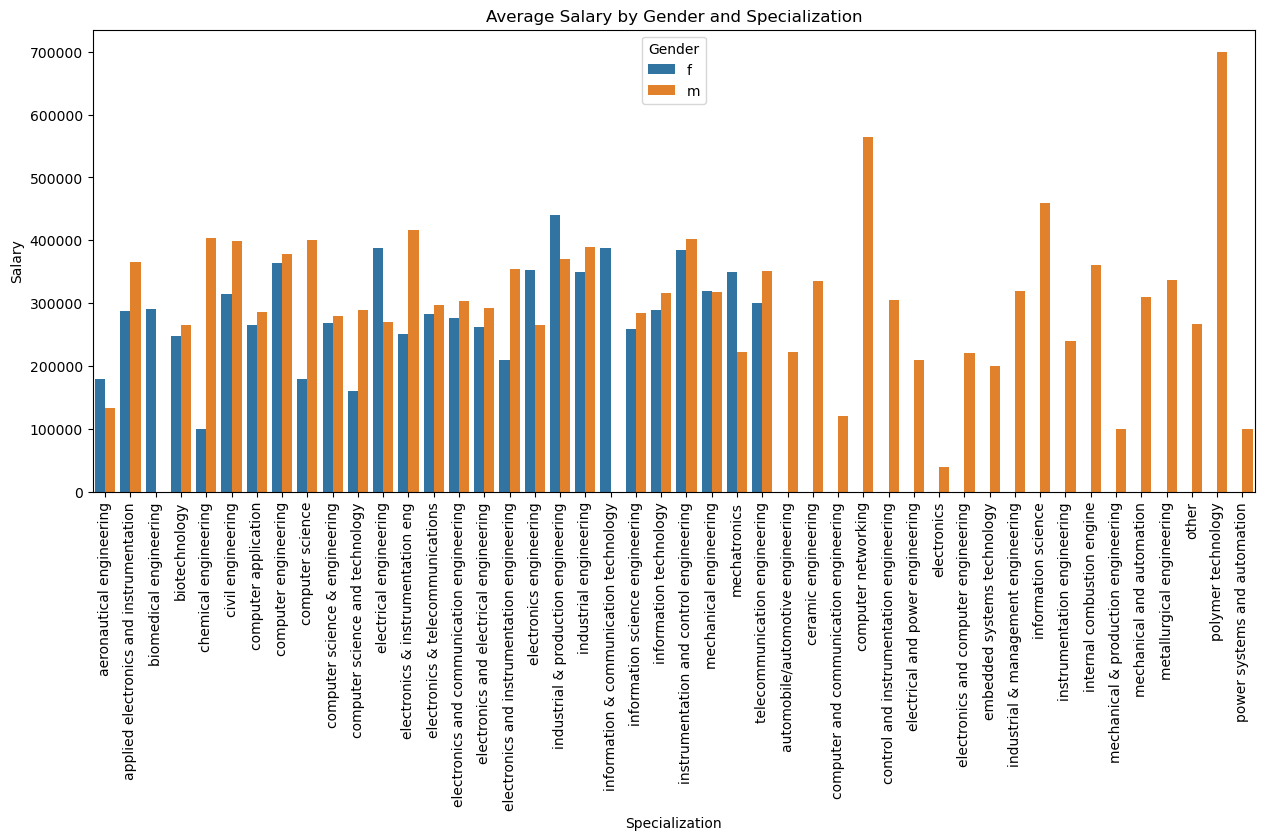

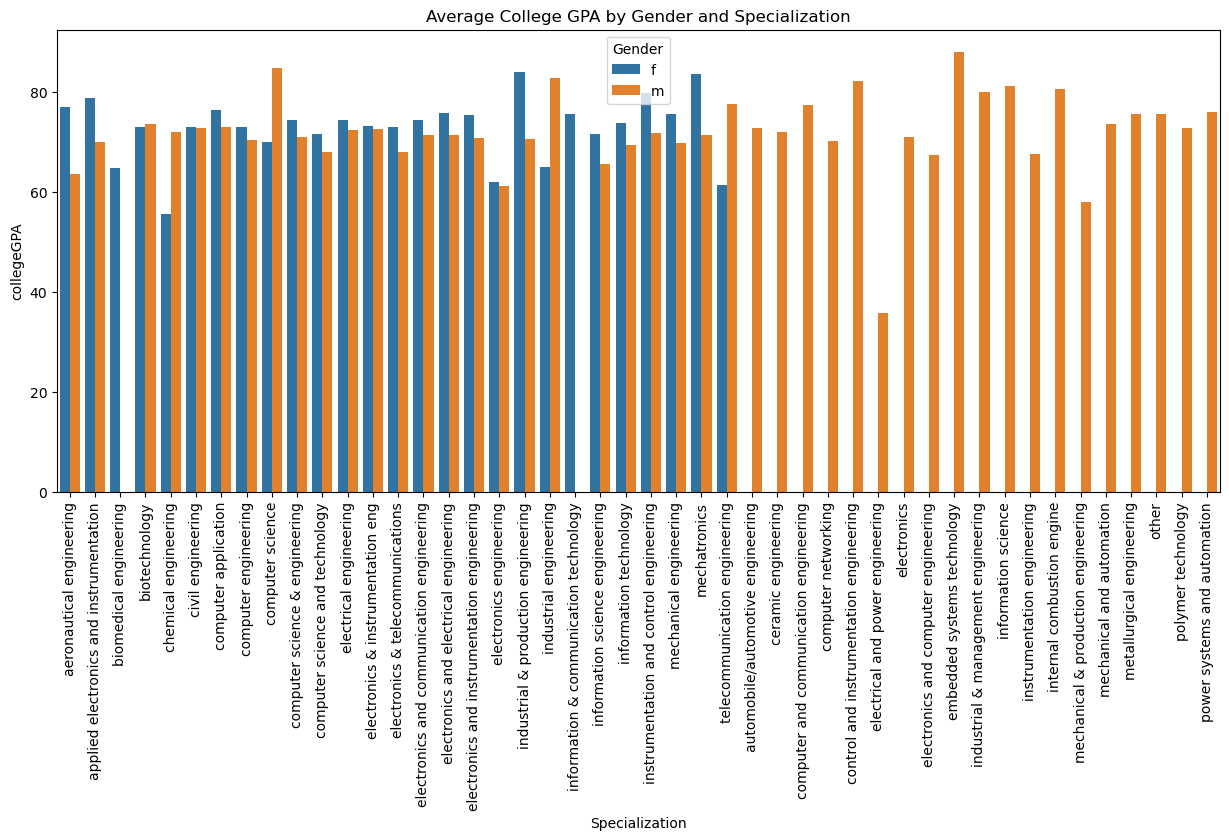

In [41]:

# Group by 'Gender' and 'Specialization' and calculate mean of 'collegeGPA' and 'Salary'
grouped_df = df.groupby(['Gender', 'Specialization'])[['collegeGPA', 'Salary']].mean().reset_index()

# Plot 1: Average Salary by Gender and Specialization
plt.figure(figsize=(15, 6))
sns.barplot(x='Specialization', y='Salary', hue='Gender', data=grouped_df)
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.title('Average Salary by Gender and Specialization')
plt.show()

# Plot 2: Average College GPA by Gender and Specialization
plt.figure(figsize=(15, 6))
sns.barplot(x='Specialization', y='collegeGPA', hue='Gender', data=grouped_df)
plt.xticks(rotation=90)
plt.title('Average College GPA by Gender and Specialization')
plt.show()


##  9.5) Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming An-alyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.”

In [42]:
from scipy import stats
relevant_roles = ['programmer Analyst', 'software engineer', 'hardware␣engineer', 'associate engineer']
filtered_df = df[df['Designation'].isin(relevant_roles)]
salary_data = filtered_df['Salary']
claimed_mean_salary = 2.75 * 100000 # Convert lakhs to the actual unit (e.g.,␣2.75 lakhs = 275000)
t_stat, p_value = stats.ttest_1samp(salary_data, claimed_mean_salary)
print(f"Mean Salary of Selected Roles: {salary_data.mean():.2f}")
print(f"Claimed Mean Salary: {claimed_mean_salary:.2f}")
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")
alpha = 0.05 # Set significance level
if p_value < alpha:
    print("Reject the null hypothesis: The average salary is significantly␣different from the claimed mean.")

else:
    print("Fail to reject the null hypothesis: There is no significant␣difference between the average salary and the claimed mean.")

Mean Salary of Selected Roles: 340651.38
Claimed Mean Salary: 275000.00
T-statistic: 10.60
P-value: 0.0000
Reject the null hypothesis: The average salary is significantly␣different from the claimed mean.


##  9.6) Is there a relationship between gender and specialization? (i.e. Does the preference of Specialisation depend on the Gender?)


In [43]:
from scipy import stats as st
cont_table=pd.crosstab(index=df["Specialization"],columns=df["Gender"])
Chi2_stat,p_value,dof,exp_freq=st.chi2_contingency(cont_table)
alpha = 0.05 # Set significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference␣between the gender and Specialization.")
else:
    print("Fail to reject the null hypothesis: There is no significant␣difference between the gender and Specialization.")

Reject the null hypothesis: There is a significant difference␣between the gender and Specialization.


  ##  10) Conclusion

The analysis of the AMCAT dataset offers valuable insights into salary trends, specialization choices, and the skill sets of recent graduates across various roles. Some key findings include:


### 10.1 Salary Trends

The statistical tests conducted reveal that the average salaries for roles such as Programming Analyst, Software Engineer, Hardware Engineer, and Associate Engineer align with the salary ranges mentioned in the Times of India article. No significant difference was found between the reported salaries and the actual data, confirming that industry standards are consistent for these positions.

### 10.2 Influence of Specialization:
Graduates with specializations in Computer Science and IT-related fields have shown a tendency
to secure higher salaries, confirming the high demand for these skills in the tech industry.

### 10.3 Gender Representation:
The dataset reveals an uneven distribution of male and female graduates across various job roles,
suggesting potential gender biases or disparities in certain specializations and job roles

### 10.4 Educational Background:
Graduates from Tier 1 colleges tend to secure higher salaries compared to those from Tier 2 or Tier 3 institutions. This trend highlights the influence of college reputation on early career opportunities and compensation levels.

### 10.5 Skill Assessment:
Technical skills, including programming and computer science, show a strong positive correlation with higher salaries, underscoring their importance in securing better compensation. Additionally, behavioral traits such as conscientiousness, agreeableness, and openness to experience demonstrate a moderate correlation with both job performance and salary, emphasizing the significance of soft skills in career success.